# Przygotowywanie wykresów do publikacji

## Co to jest "publikacja"?

W końcu, po przeprowadzeniu eksperymentu i przeanalizowaniu danych chcielibyśmy zaprezentować światu nasze odkrycia (lub ich brak). "Publikacją" w takim wypadku może być artykuł naukowy, praca roczna, praca dyplomowa, plakat czy wystąpienie konferencyjne. Każdą z tych form "publikacji" rzadza odmienne zasady. Warto jednak pamiętać o kilku podstawowych zasadach przygotowywania wizualizacji:

1. **Dostosuj liczbę informacji na wykresie do kontekstu**

W czasie wystąpienia konferencyjnego, podczas którego jeden slajd wyświetlany jest przez 1-2 minuty nie ma sensu pokazywanie tysiąca różnych informacji na skomplikowanym wykresie. W artykule naukowym, pracy rocznej czy pracy dyplomowej możesz zamieścić bardziej skomplikowne wykresy. Na plakacie konferencyjnym staraj się unikać wykresów z dużą liczbą szczegółów - będą niewidoczne i dodatkowo odstraszą potencjalnych słuchaczy od zainteresowania się plakatem.

2. **Dostosuj rodzaj wykresu do odbiorcy**

Jeśli przygotowujesz wykres na niespecjalistyczną konferencję, artykułu, którego adresatami nie są specjaliści w zakresie badań empirycznych, lub po prostu artykułu popularnonaukowego staraj się używać prostych wykresów (takich jak wykres słupkowy). Jeżeli wiesz, że odbiorcami będą specjaliści, możesz zrobić coś ekstra. Najważniejszą zasadą jest jednak trzymanie się standardów w danej dyscyplinie naukowej - jeśli jakiś rodzaj wykresu jest przyjęty jako domyślny sposób prezentacji danych określonego rodzaju, to należy się do tego dostosować.

3. **Nie każdy wykres jest wykresem do publikacji**

Dwie powyższe zasady nie oznaczaja, że zawsze powinniśmy trzymać się najprostszych wykresów. Czasami możemy stworzyć wykres w celach eksploracyjnych - wizualizując dane możemy łatwiej dostrzec ich interesujące własności lub pewne wzorce. Jeśli odbiorcą wykresu mają być współpracownicy, to czasami można poświęcić chwilę aby wyjaśnić im jakiś niekonwencjonalny rodzaj wykresu, jeśli ilustruje jakąś ważną informacje na temat danych. Jeżeli głównym odbiorcą wykresu masz być Ty sam, to oczywiście można puścić wodze fantazji.

## Formaty eksportu obrazów

Zwykle będziemy chcieli wyeksportować nasz rysunek do pliku, aby umieścić go potem w dokumencie tekstowym/prezentacji/na plakacie. Wybór dobrego formatu nie jest oczywisty, dlatego poniżej krótka ściągawka:

### Dobre formaty
- **SVG** - format wektorowy, będzie dobrze wyglądał niezależnie od rozmiaru.
- **PNG** - format rastrowy, należy zapisać go w odpowiednim DPI (*dots per inch*), jesli chcemy dać go na prezentację lub plakat. W 2019 roku warto być po bezpiecznej stronie, dlatego proponuję zawsze eksportować zawsze przynajmniej w 300 DPI.
- **TEX** - jeśli piszemy artykuł w LaTeXu, to zwykle możemy wyeksportować wykres do pliku obsługiwanego przez bibliotekę `tikz` i narysować go natywnie.
- **PDF**, **PS** - oba te formaty bardziej nadają się do dokumentów niż obrazów, ale z powodu tego że są wektorowe to zwykle można z nimi sobie poradzić.

### Złe formaty
- **JPG** - format służący do kompresji zdjęć, w przypadku figur geometrycznych i tekstu wprowadza zniekształcenia.
- **BMP** - żyjemy w XIX wieku, nie.
- **obrazek wycięty ze screenshota** - zwykle będize miał DPI takie jak Państwa ekran, czyli zbyt niskie aby dobrze wyglądać w druku lub gdziekolwiek indziej.

## Eksport do plików wykresów stworzonych w `seaborn` i `matplotlib`

Poniżej znajduje się prosty kod ilustrujący eksportowanie wykresów wykonanych w `seaborn` i `matplotlib` do rozmaitych formatów - do PNG, do SVG i do LaTeXa.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../06_Statystyczne_testowanie_hipotez/bi-stroop.csv')
data.head()

,Unnamed: 0,participant,condition,rt,lang
0,0,1,congruent,445.882646,pol
1,1,1,congruent,265.583884,pol
2,2,1,incongruent,392.007832,pol
3,3,1,congruent,349.962448,pol
4,4,1,incongruent,188.844854,pol


/home/bartosz/.local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


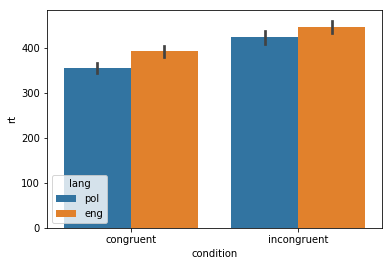

In [3]:
sns.barplot(x = 'condition',
            hue = 'lang',
            y = 'rt',
            ci = 99, # domyślnie jest to odchylenie standardowe
            data = data)
plt.savefig('plot1.png') # zwykły PNG
plt.savefig('plot1_300dpi.png', dpi = 300) # PNG, ale tym razem w 300 DPI, plik wynikowy jest 8x większy
plt.savefig('plot1_vector.svg') # SVG, format wektorowy, dobrze wygląda niezależnie od powiększenia

from matplotlib2tikz import save as tikz_save
tikz_save("plot1.tex") # jeśli chcemy eksportować do formatu `tikz` + dodatkowe informacje o użyciu

## Dostosowywanie wyglądu wykresów z pakietu `seaborn`

Jeśli wykresy w bibliotece `seaborn` możemy bardzo łatwo zmienić ich:
   + ogólny motyw graficzny za pomocą funkcji `set_style` (np. `whitegrid`)
   + wielkośc elementów tekstowych za pomocą funkcji `set_context` (`paper`, `talk`, `poster` lub `notebook`, domyślnie `notebook`)
   + paletę kolorów za pomocą funkcji `set_palette`
   + wielkość wykresu za pomocą funkcji `set`
   
Nie są to wszystkie możliwości jakie daje `seaborn` (odsyłam tu do dokumentacji poszczególnych rodzajów wykresu) ale wymienione wyżej funkcje pozwalają zrobić większość podstawowych  przydatnych rzeczy.

**Uwaga**. Opcje te działają globalnie, jeśli chcemy zastosować je tylko do jednego kontekstu to musimy albo:
+ ustawiać je przed każdym wykresem, lub
+ użyć składni *context managera* (`with sns.set_style(whitegrid):`)

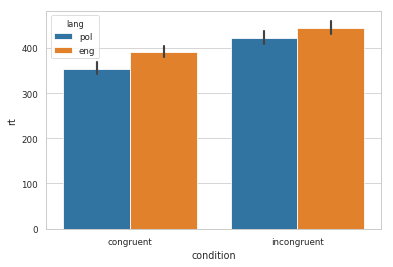

In [4]:
sns.set_style("whitegrid") 

sns.set_context('paper')


sns.barplot(x = 'condition',
            hue = 'lang',
            y = 'rt',
            ci = 99, # domyślnie jest to odchylenie standardowe
            data = data)

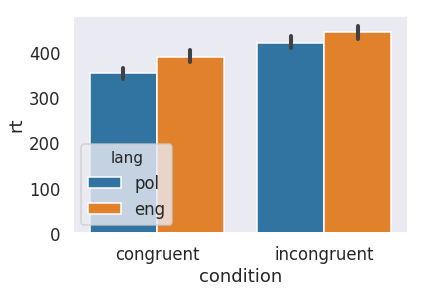

In [5]:
sns.set_style("dark") 

sns.set_context('talk')

sns.barplot(x = 'condition',
            hue = 'lang',
            y = 'rt',
            ci = 99, # domyślnie jest to odchylenie standardowe
            data = data)

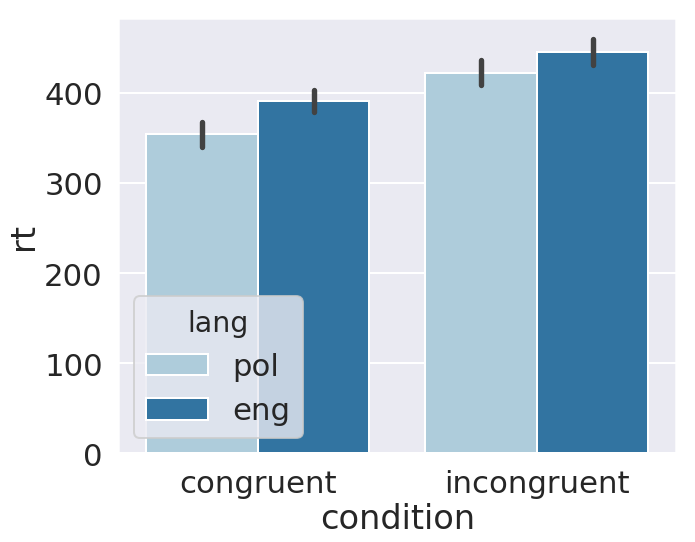

In [6]:
sns.set_style("darkgrid") # ogólny motyw
sns.set(rc={'figure.figsize':(10,8)}) # zmieniamy wielkośc wykresu na 10x8

## set_context i set_palette muszą pojawić się po set()
sns.set_context('poster', font_scale= 1.4) # font_scale pozwala dodatkowo zmniejszać/zwiększać tekst
sns.set_palette("Paired") # nazwa palety z color brewera

sns.barplot(x = 'condition',
            hue = 'lang',
            y = 'rt',
            ci = 99, # domyślnie jest to odchylenie standardowe
            data = data)